# <font color=cyan><b>KING COUNTY HOUSING PREDICTION MODEL.</b></font> 




<img src="https://cdn.tollbrothers.com/communities/14390/images-resized/Canopy_Cottages_NORTH_GREEN_STREETSCAPE_4140_WA-1_920.jpg"/>


### Collaborators

- Maya Bororio
- Bourzat Ilyas
- Joseph Matheri
- Ruth Kitasi
- Nicholas Kirui
- Robert Kalafa

### Project Duration

- One Week

- Start date 13th July 2024 
- End date 19th July 2024


## <font color=green><i>1. Business understanding</i></font> 

### 1.1 Introduction
King County is a vibrant community in Seattle, Washington, with residents from diverse backgrounds, representing countries from around the world. The real estate market in King County exhibits considerable variation in house prices due to multiple factors such as property features and market trends. The complexity and dynamism of the market make it challenging to predict house prices accurately.

    References: 
    'https://kingcounty.gov/en/legacy/audience/employees/careers', 





### 1.2 Business problem

The unpredictability of house prices poses a significant challenge for various stakeholders, including potential homebuyers and real estate agents. These stakeholders require accurate and reliable house price predictions to make informed decisions. Homebuyers need to understand market trends to make prudent purchasing decisions while the  real estate agents need accurate data to advise their clients effectively, 

### 1.3 Objectives

Our role as data scientists is to develop a  house price prediction model that meet the following objects-:

- Determine which features have the most significant impact on house prices.
- Examine the correlations between different features and house prices to identify strong relationships.
- Build a predictive model to estimate house prices based on features.



## <font color=green><i>2. Data understanding</i></font> 

To understand the dataset we are working on, we first import necessary libraries and then load dataset to have a view of the few rows of the dataset.

### 2.1 Importing Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import itertools
from numbers import Number
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy import stats


### 2.2 Loading the dataset

In [2]:
#Loading dataset

df = pd.read_csv('data\kc_house_data.csv')  
df.sample(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21203,9492500010,6/6/2014,879950.0,4,2.75,3010,7215,2.0,0.0,0.0,...,9,3010,0.0,2014,0.0,98033,47.6952,-122.178,3010,7215
12385,3959400335,4/23/2015,560000.0,3,2.00,1640,7333,1.0,0.0,0.0,...,7,1020,620.0,1941,0.0,98108,47.5636,-122.316,2130,4933
17544,7631800015,4/7/2015,2510000.0,3,3.25,5480,57990,2.0,1.0,4.0,...,11,5480,0.0,1991,0.0,98166,47.4558,-122.371,2500,22954
19324,3019300090,7/23/2014,535000.0,2,3.50,2560,5000,1.0,0.0,0.0,...,6,1280,1280.0,1944,0.0,98107,47.6681,-122.368,1390,4000
6976,824059265,10/1/2014,1160000.0,3,1.75,1640,10464,1.0,NaN,2.0,...,8,1640,0.0,1968,0.0,98004,47.5873,-122.205,2630,18872
18799,2652500740,6/18/2014,855000.0,4,2.25,2190,4080,2.0,0.0,0.0,...,8,1800,390.0,1918,0.0,98119,47.6425,-122.358,2100,4080
17313,3629830250,12/22/2014,637500.0,4,3.00,2320,4468,2.0,0.0,0.0,...,8,2160,160.0,1999,0.0,98029,47.5460,-122.009,2330,3541
18177,1311200120,5/13/2014,225000.0,3,1.00,1660,7210,1.0,0.0,0.0,...,7,1100,560.0,1963,0.0,98001,47.3394,-122.281,1660,7245
5982,4172100050,8/25/2014,524950.0,3,1.75,1750,3250,1.5,0.0,0.0,...,7,1230,520.0,1929,0.0,98117,47.6807,-122.366,1480,3600
3465,4058801240,10/28/2014,330000.0,3,2.25,1620,7150,1.0,0.0,2.0,...,7,1280,340.0,1950,0.0,98178,47.5048,-122.241,1620,6930


### 2.3 Data description


The dataset provided contains house sale prices for King County, Washington, along with various features that describe each property. This dataset is well-suited for our objectives due to the diverse range of attributes it includes, which are essential for accurately predicting house prices.

 Each column in the dataset represents a specific feature that can influence the house price. Below is a description of each feature:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



### 2.3 Presenting the size of the dataset

In [3]:
print("No: of rows is", df.shape[0])
print('No: of  columns is ', df.shape[1])

No: of rows is 21597
No: of  columns is  21


### 2.4 Justification of feature inclusion

- For this analysis, we will include features that exhibit the highest positive correlation to price.

### 2.5 limitations of the data that have implications for the project

- Omitted Variables: Some relevant variables may be omitted, impacting the comprehensiveness of the dataset
- Missing Values: Certain columns have missing values, which can affect the completeness of the analysis.
- Accuracy: The data may not be entirely accurate due to the lack of information about the data collection processes.
- Data Capture and Entry Errors: There is a potential for errors that may have occurred during the data capture and entry stages.
  


## <font color=green><i>3. Data preparation</i></font> 

Data preparation is a critical step in the data analysis process, involving the cleaning, transforming, and organizing of raw data to make it suitable for analysis. Proper data preparation ensures that the data is accurate, consistent, and formatted correctly, which is essential for building reliable and valid models


In [4]:
#running the first five rows of each column 

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The above output gives an overview of the  contents of each column.
Bathrooms data is shown as float. while this is logically wrong, we round this to whole number for easy analysis and manipulation.

In [5]:
#Rounding of the bathroom data to whole number.

df["bathrooms"] = df.bathrooms.round()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.0,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.0,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,1.0,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.0,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
#viewing the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset contains 21,597 entries and 21 columns with 19 being numerical columns and 2 being categorical columns. The two categorical columns; date and sqft_basement need to be changed to date and a numerical columns respectively since they are not accurately represented as categorical columns.

In [7]:
# changing the date collumn to date type.
df['date'] = pd.to_datetime(df['date'])

# changing the date collumn to date type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [8]:
#getting the statistical summary of the dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The output shown above provides a quick overview of the data, helping us understand its basic characteristics and identify potential issues that need to be addressed during data preparation.

In [9]:
# unique values for categorical features

print(df['waterfront'].value_counts())
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


In [10]:
# #detecting missing values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

we have three column with null value:
 - waterfront 2,376
 - view 64
 - yr of renovation

In [11]:
# # assessing the waterfront category

df["waterfront"].value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

The "waterfront" column appears to be binary, indicating whether a property is on the waterfront (1) or not (0).

 - There are 19,075 properties that are not on the waterfront (0.0).
 - There are 146 properties that are on the waterfront (1.0)


In [12]:
# # assessing the waterfront category
df["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [13]:
#filling the missing value of view with 5 for unknown rating

df["view"]=df["view"].fillna(5)


In [14]:
#converting the view column to categorical

df["view"] = df["view"].astype('category')


In [15]:
#Renaming the categories

df["view"] = df["view"].cat.set_categories([0, 1, 2, 3, 4, 5])
df["view"].cat.rename_categories({0: 'No view', 1: 'Poor view', 2: 'Average view', 3: 'Good view', 4: 'Excellent view',5: 'Unknown'}, inplace=True)

print(df["view"].value_counts())


No view           19422
Average view        957
Good view           508
Poor view           330
Excellent view      317
Unknown              63
Name: view, dtype: int64


In [16]:
#checkingfor duplicate rows

df.duplicated().sum()

0

In [17]:
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['sqft_basement'].fillna(0, inplace=True)  # Assuming NaN means no basement
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation

In [18]:
#removing unneccesary columns.
df.drop(['id','date','zipcode'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0.0,No view,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.0,2570,7242,2.0,0.0,No view,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,No view,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,No view,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,No view,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


- The output for checking for the duplicate values shows  that there are no duplicate rows present. 
- This means each row in the  dataset provided is unique. 

## Multivariate Analysis

In [19]:
# Computing correlation matrix

corr_matrix = df.corr()

# Extract the correlations with 'price' and sort in descending order
price_relation = corr_matrix["price"].sort_values(ascending=False)
print(price_relation)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64


The output above shows the streghth of the house features in relation to price.
- sqdt_living exhibits the highest correlation value to price.
- Id Exhibits the lowerst correlation value to price

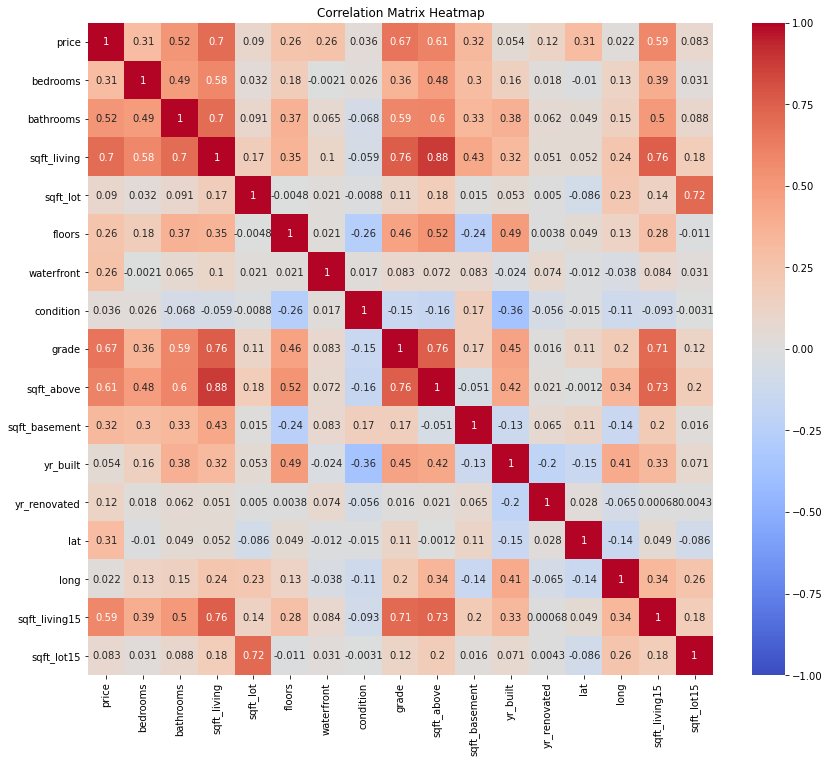

In [20]:
# Correlation heatmap of columns

correlation_matrix =  df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Strong Positive Correlations:

- sqft_living (0.70): Indicates that as the square footage of living space increases, the price tends to increase.
- grade (0.67): Suggests that higher grades (likely indicating better quality or more luxurious homes) are associated with higher prices.
- sqft_above (0.61): Indicates that the square footage of space above ground level is positively correlated with price.
- bathrooms (0.52): More bathrooms are associated with higher price

Moderate Positive Correlations:
- bedrooms (0.31): More bedrooms are associated with higher prices, but the correlation is not as strong as with other features.
- floors (0.26): Houses with more floors tend to have higher prices

Negative Correlations:

- yr_built: Negatively correlated with condition (-0.36): Suggests that older homes tend to be in worse condition.
- zipcode:Negatively correlated with sqft_above (-0.26) and sqft_living (-0.15), indicating some regional variations in home sizes.

In [21]:
#dropping uneccesaary columns


In [22]:
# Exctracting relevant column for the analysis

rel_columns = ["price", "bathrooms", "sqft_living","grade", "sqft_above", "sqft_living15"]

# loading the columns to a dataframe for analysis
rel_df = df[rel_columns] 
rel_df.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.0,1180,7,1180,1340
1,538000.0,2.0,2570,7,2170,1690
2,180000.0,1.0,770,6,770,2720
3,604000.0,3.0,1960,7,1050,1360
4,510000.0,2.0,1680,8,1680,1800


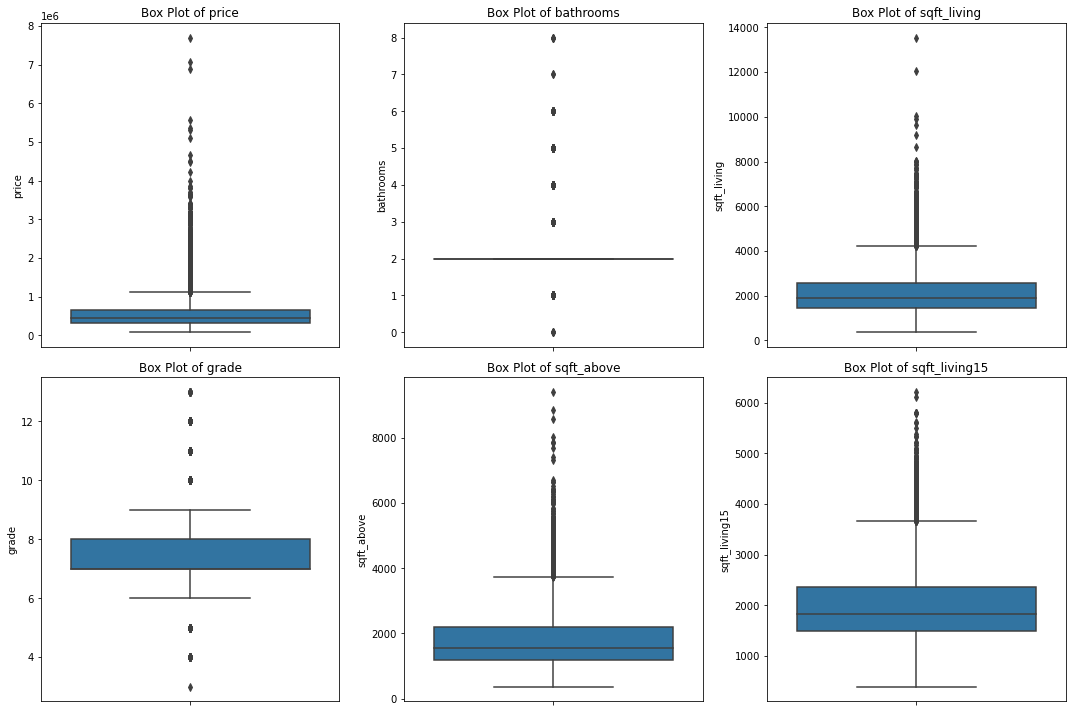

In [23]:
#plotting  box plots for selected features to show outliers.
def plot_box_plots(df, columns):
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
        sns.boxplot(data=df, y=column)
        plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

# Plot box plots for each feature of interest
rel_columns = ["price", "bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]
plot_box_plots(rel_df, rel_columns)


- Outliers: The selected features have a noticeable number of outliers, particularly on the higher end. This is common in real estate data where a few properties may have extremely high values.
- Distribution: Most features have their values concentrated around the median with relatively small IQRs, indicating that the majority of the properties fall within a specific range for each feature.
- Variability: Features like square feet living and square feet above show more variability compared to others like bathrooms and grade

In [24]:
# Statistical view to confirm the outliers plotted above
#df.describe()
min_max_summary = df.agg(['min', 'max'])
min_max_summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
min,78000.0,1,0.0,370,520,1.0,0.0,1,3,370,0.0,1900,0.0,47.1559,-122.519,399,651
max,7700000.0,33,8.0,13540,1651359,3.5,1.0,5,13,9410,4820.0,2015,2015.0,47.7776,-121.315,6210,871200


In [25]:
# we now remove outliers from our data
for feature in rel_df:
    Q1 = rel_df[feature].quantile(0.25)
    Q3 = rel_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = rel_df[(rel_df[feature] >= lower_bound) & (rel_df[feature] <= upper_bound)]

# Verify the changes
print(rel_df.info())
print(rel_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   grade          21597 non-null  int64  
 4   sqft_above     21597 non-null  int64  
 5   sqft_living15  21597 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1012.5 KB
None
              price     bathrooms   sqft_living         grade    sqft_above  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05      2.059777   2080.321850      7.657915   1788.596842   
std    3.673681e+05      0.754435    918.106125      1.173200    827.759761   
min    7.800000e+04      0.000000    370.000000      3.000000    370.000000   
25%    3.220000e+05      2.000000   1430.000000      7.000000   1190.000000   
50%    4

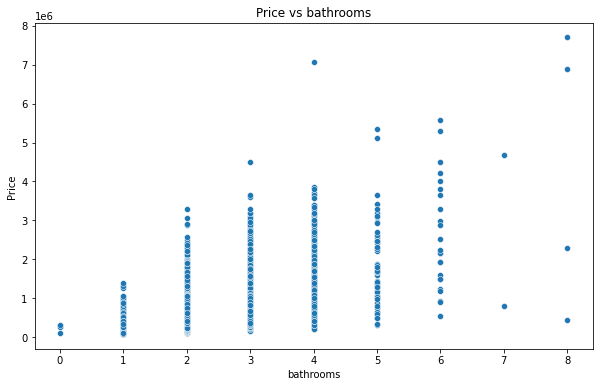

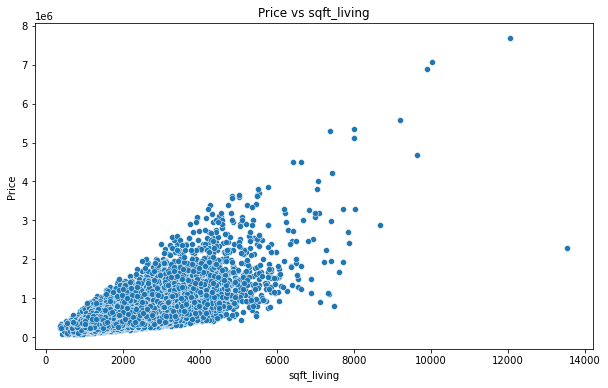

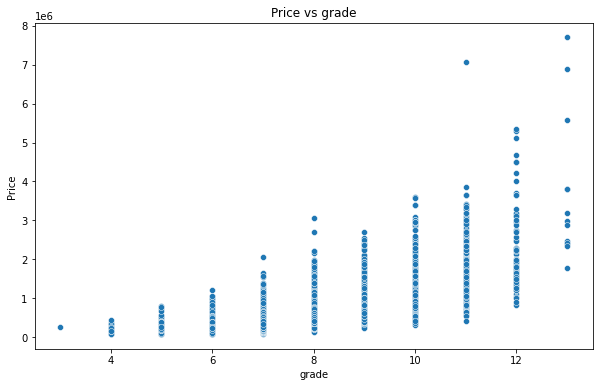

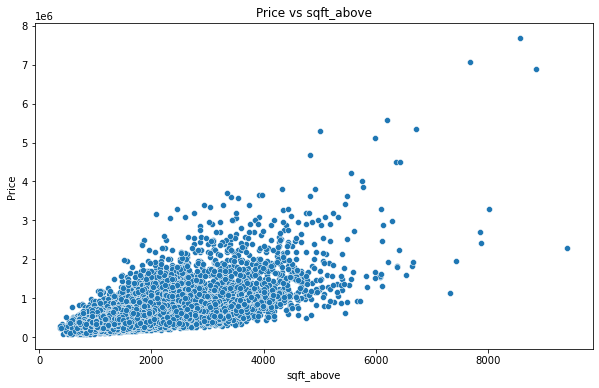

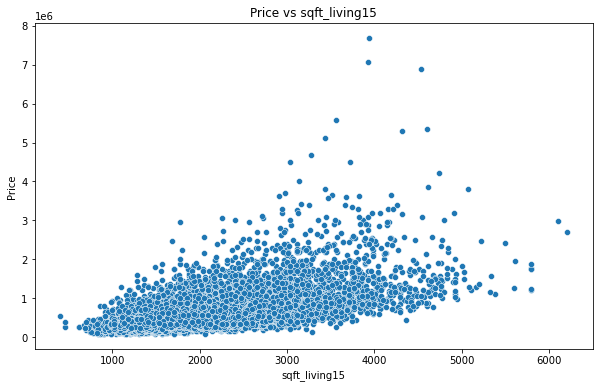

In [26]:
# we now create scatter plots for each feature against price
for feature in rel_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rel_df, x=feature, y="price")
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

### Creating scatter plots for each feature against price and have the line of best fit  to visualize the correlationship of the features with price

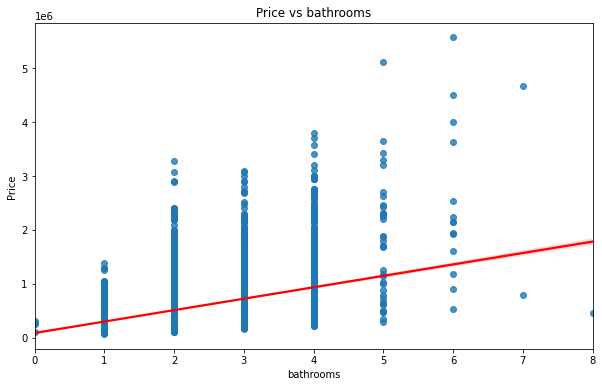

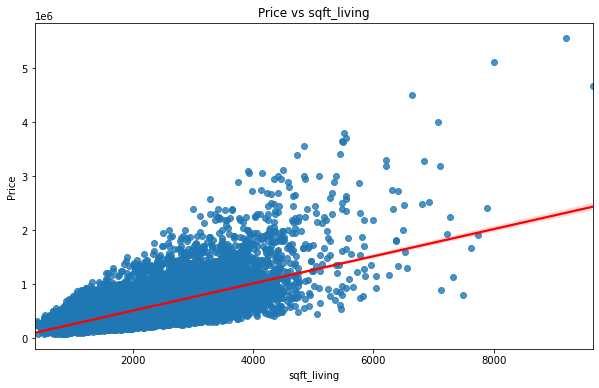

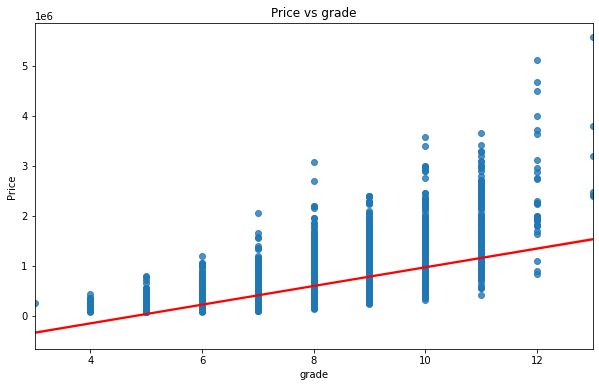

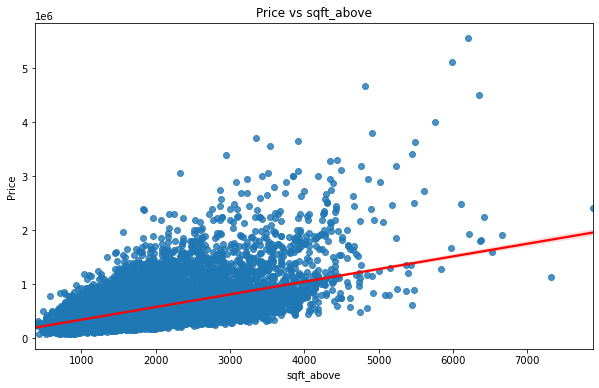

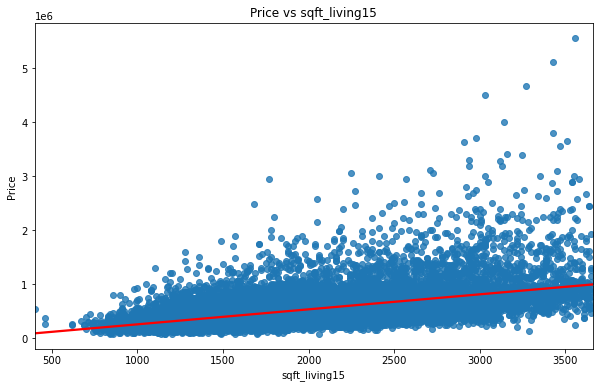

In [27]:

for feature in rel_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=feature, y="price", line_kws={"color":"red"})
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

## <font color=green><i>4. Modelling</i></font> 

In [28]:
# setting up our variables before we split data for training our model
x = rel_df[rel_columns[1:]]  # these are the independent variables
y = rel_df["price"]  # This is the dependent variable

# We now split the data into training and test sets at 80% for training and at 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Verify the split
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Test data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (17277, 5), (17277,)
Test data shape: (4320, 5), (4320,)


In [29]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 59396812552.805336
R^2 Score: 0.5553100400643592


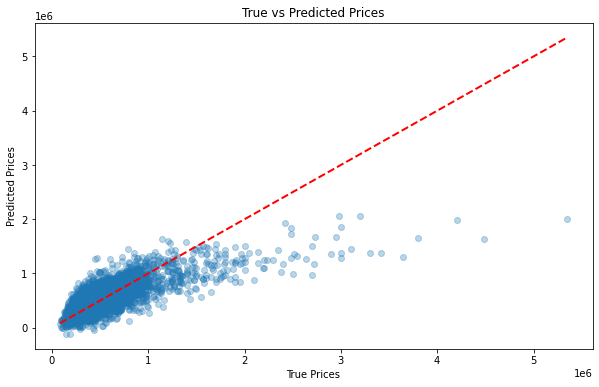

In [30]:
# Plotting the true vs predicted prices to see how strong our model is
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

In [31]:
# Model 2
# Log transform the price variable
rel_df['price_log'] = np.log(rel_df['price'])

# Define independent and dependent variables
x = rel_df[rel_columns[1:]]  # independent variables
y = rel_df['price_log']  # log-transformed dependent variable

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Scale the independent variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # Use the same scaler as for training data

# Verify the split
print(f"Training data shape: {x_train_scaled.shape}, {y_train.shape}")
print(f"Test data shape: {x_test_scaled.shape}, {y_test.shape}")


Training data shape: (17277, 5), (17277,)
Test data shape: (4320, 5), (4320,)


<ipython-input-31-c15f756af6ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['price_log'] = np.log(rel_df['price'])


Mean Squared Error (log scale): 0.11799065843468408
R^2 Score (log scale): 0.5759728899784078


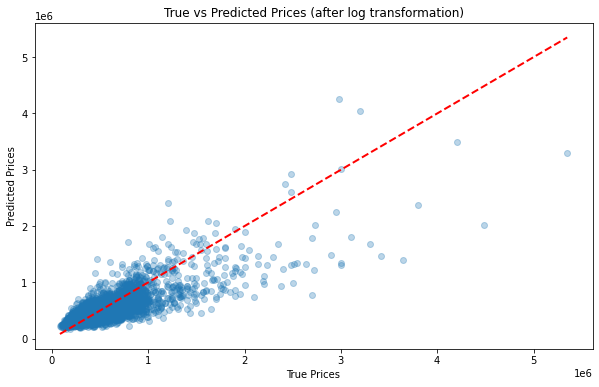

In [32]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_log = model.predict(x_test_scaled)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)

print(f"Mean Squared Error (log scale): {mse}")
print(f"R^2 Score (log scale): {r2}")

# Plotting the true vs predicted prices to see how strong our model is
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_log), alpha=0.3)
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices (after log transformation)')
plt.show()

In [33]:
# Model 3
# Log transform the price and sqft_living variables
rel_df['price_log'] = np.log(rel_df['price'])
rel_df['sqft_living_log'] = np.log(rel_df['sqft_living'])
rel_df['sqft_living_15_log'] = np.log(rel_df['sqft_living15'])

# Define independent and dependent variables
x = rel_df[rel_columns[1:]]  # independent variables
y = rel_df['price_log']  # log-transformed dependent variable

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Scale the independent variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # Use the same scaler as for training data

# Verify the split
print(f"Training data shape: {x_train_scaled.shape}, {y_train.shape}")
print(f"Test data shape: {x_test_scaled.shape}, {y_test.shape}")


Training data shape: (17277, 5), (17277,)
Test data shape: (4320, 5), (4320,)


<ipython-input-33-7b8892810509>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['price_log'] = np.log(rel_df['price'])
<ipython-input-33-7b8892810509>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['sqft_living_log'] = np.log(rel_df['sqft_living'])
<ipython-input-33-7b8892810509>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

         Feature  Coefficient
0      bathrooms     0.014839
1    sqft_living     0.244279
2          grade     0.221665
3     sqft_above    -0.122314
4  sqft_living15     0.063957
Mean Squared Error (log scale): 51687094443.10875
R^2 Score (log scale): 0.6130308855098637


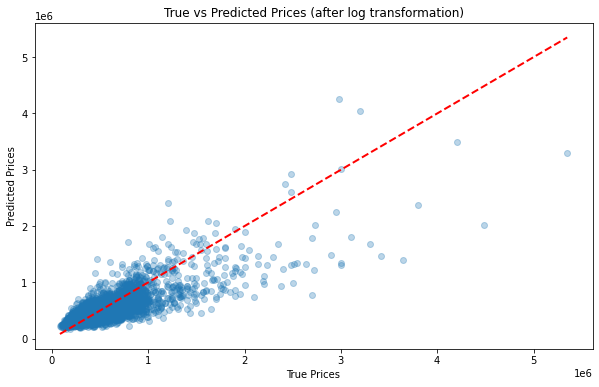

In [34]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# Make predictions on the test set
y_pred_log = model.predict(x_test_scaled)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)

# Evaluate the model
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred_log))
r2 = r2_score(np.exp(y_test), np.exp(y_pred_log))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the true vs predicted prices to see how strong our model is
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_log), alpha=0.3)
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices (after log transformation)')
plt.show()


Interpretation of final model:
**sqft_above (Coefficient: -0.122314):**
- This negative coefficient suggests that an increase in square footage above ground level (sqft_above) is associated with a decrease in predicted house prices.
This could imply that larger above-ground areas might not always translate to higher prices, possibly indicating regional pricing norms or property characteristics specific to your dataset.
**sqft_living15 (Coefficient: 0.063957):**
- This coefficient suggests that an increase in the average square footage of nearby (15 closest) living spaces (sqft_living15) is associated with a slight increase in predicted house prices.
This feature could capture the neighborhood effect, where larger nearby houses tend to influence prices positively.
- **grade (Coefficient: 0.221665):**
The grade of the house (e.g., from 1 to 13 in some grading systems) also has a positive impact on predicted house prices.
A higher grade suggests better overall quality, which typically correlates with higher prices.
- **sqft_living (Coefficient: 0.244279):**
This coefficient suggests that for every unit increase in square footage of living space (sqft_living), the predicted house price increases by approximately 0.244279 units in logarithmic terms.
Square footage is a significant predictor of house prices, indicating that larger living spaces tend to command higher prices.
- **bathrooms (Coefficient: 0.014839):**
A positive coefficient suggests that an increase in the number of bathrooms is associated with a higher predicted house price.
However, the magnitude (0.014839) indicates that bathrooms have a relatively small effect compared to other features in your model.

## <font color=green><i>5.Regression results </i></font> 

MSE is relatively low compared to our variance, thus it suggests that the model's predictions is close to the actual values.

R^2 Score of 0.61 is closer to 1 indicating that a high proportion of the variance in the dependent variable (price) is predictable from the independent variables (bathrooms, sqft_living, grade, sqft_above, sqft_living15).

In [35]:
# Print summary statistics for the target variable
summary_stats = rel_df['price'].describe()
print("\nSummary statistics for house prices:")
print(summary_stats)

# Calculate and print variance
variance = rel_df['price'].var()
print(f"Variance of house prices: {variance}")


Summary statistics for house prices:
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
Variance of house prices: 134959350361.55782


#### Performing validation  to results of our model
* Cross-Validation MSE Scores: Individual MSE scores for each fold.
* Mean Cross-Validation MSE: Average MSE across all folds. This provides a more robust estimate of the model's performance.
* Standard Deviation of Cross-Validation MSE: Indicates the variability in MSE scores across folds. Lower standard deviation suggests more consistent model performance.

In [36]:
# Creating a function that will take in a user input of the prefered house and predict the house price

def house_price_estimation(model):
    print("Enter the following details to get an estimated house price:")
    bathrooms = int(input("Number of bathrooms: "))
    sqft_living = int(input("Square footage of the living area: "))
    grade = int(input("Grade (1-13, where 13 is the best): "))
    sqft_above = int(input("Square footage above ground: "))
    sqft_living15 = int(input("Square footage of living space for the nearest 15 neighbors: "))
    
    # We then create a DataFrame with the keyed in prefered feautures
    input_data = pd.DataFrame({
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'grade': [grade],
        'sqft_above': [sqft_above],
        'sqft_living15': [sqft_living15]
    })
    
    # Predicting price of the house
    estimated_price = model.predict(input_data)[0]
    
    print(f"Estimated house price: ${estimated_price:,.2f}")

# Call the function to get user input and predict house price
house_price_estimation(model)

Enter the following details to get an estimated house price:
Estimated house price: $770.22


In [37]:
# Defining the MSE scorer
mse_scorer = make_scorer(mean_squared_error)

# Performing a 5-fold cross-validation for each of our feature
cv_scores = cross_val_score(model, x, y, cv=5, scoring=mse_scorer)

# Print out the cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation MSE: {np.std(cv_scores)}")

Cross-Validation MSE Scores: [0.12558022 0.12218033 0.12083895 0.12361619 0.10541023]
Mean Cross-Validation MSE: 0.11952518382040256
Standard Deviation of Cross-Validation MSE: 0.007230592883311275


## Conclusions based on the analysis.

### Determine which features have the most significant impact on house prices.
- Features such as sqft_living ,grade,  sqft_above, sqft_living15, bathrooms and sqft_base have the most significant impact on price due to ther positve correlation to price.

 ### Examine the correlations between different features and house prices to identify strong relationships.
 - sqft_living shows the strongest positive correlation of  0.701917. this means that increase in sqft_living increases the price of the house.

### Build a predictive model to estimate house prices based on features.
- The model has a moderate R² score, suggesting it captures some, but not all, of the variability in house prices.
- The MSE is relatively low compared to the variance of house prices, indicating credible model accuracy for our predictions.
- The consistent cross-validation MSE suggests the model's performance is stable across different subsets of data.


## Recommendations

Increasing the square footage of living space positively impacts the price of a house. Additionally, enhancing features that have a strong positive correlation with price can further boost property value. We recommend focusing on both expanding living space and improving key features to maximize the overall price of the house

---------------------------------------------------------------------------------------------------------------------------------------